----

In [1]:
from sklearn import datasets

from sklearn import datasets
import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the conda prompt.

In [3]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=80, resize=0.4)

In [4]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

In [5]:
print(faces.DESCR)

LFW faces dataset


In [6]:
import pandas as pd
df_faces = pd.DataFrame(faces.data)
df_faces['target'] = pd.Categorical(pd.Series(faces.target))

df_faces.describe()
df_faces.describe(include=['category'])
print(df_faces.shape)

### Data points for each class
print(np.unique(y, return_counts=True))

### Find the shapes for plotting
n_samples, h, w = faces.images.shape

### Use the data directly
n_features = X.shape[1]

### Label to predict the person ID
target_names = faces.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("number of samples: %d" % n_samples)
print("number of features: %d" % n_features)
print("number of classes: %d" % n_classes)

(1140, 1851)
(array([0, 1, 2, 3, 4], dtype=int64), array([236, 121, 530, 109, 144], dtype=int64))
Total dataset size:
number of samples: 1140
number of features: 1850
number of classes: 5


In [7]:
# print out the number of classes, and corresponding name of each class
class_ids=np.unique(y)

print("\nNumber of classes: ", len(class_ids), "\n")

for i in range(len(class_ids)):

    print("Class ID: ", class_ids[i], " Name: ", faces.target_names[i])


Number of classes:  5 

Class ID:  0  Name:  Colin Powell
Class ID:  1  Name:  Donald Rumsfeld
Class ID:  2  Name:  George W Bush
Class ID:  3  Name:  Gerhard Schroeder
Class ID:  4  Name:  Tony Blair


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


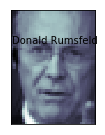

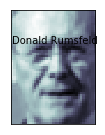

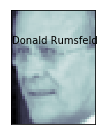

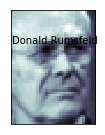

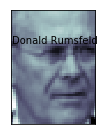

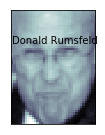

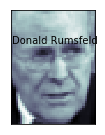

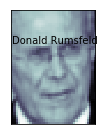

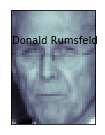

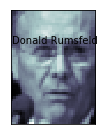

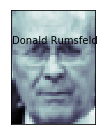

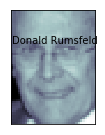

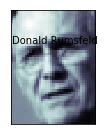

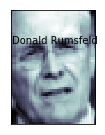

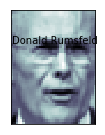

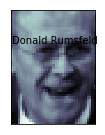

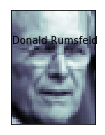

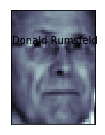

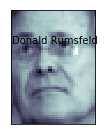

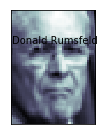

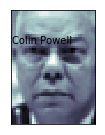

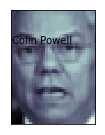

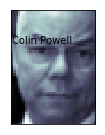

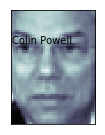

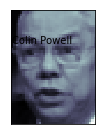

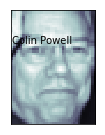

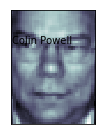

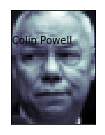

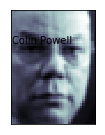

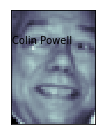

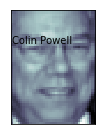

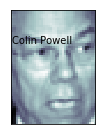

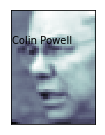

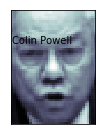

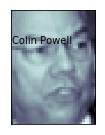

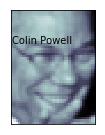

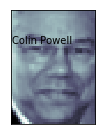

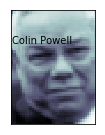

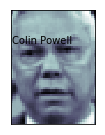

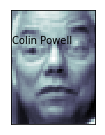

In [8]:
### Donald Rumsfeld pictures
counter = 0
face_counter = 0
while face_counter < 20:
    if faces.target_names[faces.target[counter]] == 'Donald Rumsfeld':
        fig = plt.figure(figsize=(50,50))
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.text(0, 14, str(faces.target_names[faces.target[counter]]))
        p.imshow(faces.images[counter], cmap=plt.cm.bone)
        
        face_counter = face_counter + 1
    counter = counter + 1
    
    
### Colin Powell pictures    
counter = 0
face_counter = 0
while face_counter < 20:
    if faces.target_names[faces.target[counter]] == 'Colin Powell':
        fig = plt.figure(figsize=(50,50))
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.text(0, 14, str(faces.target_names[faces.target[counter]]))
        p.imshow(faces.images[counter], cmap=plt.cm.bone)
        
        face_counter = face_counter + 1
    counter = counter + 1

In [9]:
from sklearn.model_selection import train_test_split

# split into a training and testing set
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(f"Number of training samples:\t{len(X_train)}")
print(f"Number of testing samples:\t{len(X_test)}")

Number of training samples:	798
Number of testing samples:	342


---

In [10]:
### Import Libraries
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
from sklearn.decomposition import PCA

### Create pipeline
pca = decomposition.PCA()
pipe_face_recognition = Pipeline(steps=[('pca', pca)])

logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition.steps.append(('logistic', logistic))

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

### Setting the pipeline
pipe_face_recognition.set_params(pca__n_components=30)

### Fit the training data
pipe_face_recognition.fit(X_train, y_train)

### Show the performance
#print(pipe_face_recognition.named_steps.pca.explained_variance_ratio_, "\n")
#print(pipe_face_recognition.named_steps.logistic.coef_)

### Prediction
pred_results = pipe_face_recognition.decision_function(X_test)
#pred_labels = [np.argmax(pred_results[i]) for i in range(len(pred_results))]
pred_labels = pipe_face_recognition.predict(X_test)

### Confusion matrix
print(metrics.confusion_matrix(pred_labels, y_test), "\n")
print("Accuracy = ", accuracy_score(y_test, pred_labels), "\n\n")

### Print out the classification report
target_names=["person " + str(i) for i in range(len(np.unique(y)))]
print(metrics.classification_report(pred_labels, y_test, target_names=target_names))

[[ 67   2   5   5   1]
 [  1  21   2   0   0]
 [  9  13 150   6   9]
 [  0   2   2  15   0]
 [  1   0   0   4  27]] 

Accuracy =  0.8187134502923976 


             precision    recall  f1-score   support

   person 0       0.86      0.84      0.85        80
   person 1       0.55      0.88      0.68        24
   person 2       0.94      0.80      0.87       187
   person 3       0.50      0.79      0.61        19
   person 4       0.73      0.84      0.78        32

avg / total       0.85      0.82      0.83       342



In [12]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

from statistics import stdev
import operator
from sklearn.metrics import confusion_matrix

### Using ShuffleSplit
RRTS = ShuffleSplit(n_splits=10, test_size=0.4, train_size=0.6, random_state=True)
#results = cross_val_score(pipe_face_recognition, X, y, cv=RRTS)
results = cross_validate(pipe_face_recognition, X, y, scoring= metrics, cv=RRTS)

### Fit the training data
pipe_face_recognition.fit(X_train, y_train)

### Prediction
pred_results = pipe_face_recognition.decision_function(X_train)
pred_labels = pipe_face_recognition.predict(X_train)

### Output the 4 required metrics (for training and testing)
output_metrics = ['test_accuracy', 'train_accuracy', 'test_precision_macro', 'train_precision_macro', 
                  'test_recall_macro', 'train_recall_macro', 'test_f1_macro', 'train_f1_macro']

arrays_for_output_metrics = operator.itemgetter(*output_metrics)(results)

for i in range(len(output_metrics)):
    print(output_metrics[i], "\n", 
          results[output_metrics[i]], 
          "\nMean = ", arrays_for_output_metrics[i].mean(), 
          ", Std dev =", stdev(arrays_for_output_metrics[i]), "\n")

print(confusion_matrix(pred_labels, y_train), "\n")

test_accuracy 
 [0.79605263 0.78947368 0.78508772 0.76754386 0.79605263 0.82236842
 0.74122807 0.78289474 0.77192982 0.8004386 ] 
Mean =  0.7853070175438596 , Std dev = 0.02184315231134502 

train_accuracy 
 [0.8377193  0.82748538 0.83625731 0.8494152  0.83625731 0.83040936
 0.86842105 0.82309942 0.84064327 0.83187135] 
Mean =  0.8381578947368421 , Std dev = 0.01289444584089774 

test_precision_macro 
 [0.74830647 0.75624977 0.74733877 0.73681948 0.76674657 0.78782928
 0.70946778 0.72794828 0.70287646 0.77557187] 
Mean =  0.7459154744799755 , Std dev = 0.027428882046741352 

train_precision_macro 
 [0.8168829  0.80802224 0.82125169 0.82584928 0.81863546 0.8065141
 0.84908791 0.80816492 0.8106803  0.8218187 ] 
Mean =  0.8186907485102568 , Std dev = 0.012613457855942948 

test_recall_macro 
 [0.71087535 0.70060564 0.6918776  0.68526049 0.73121735 0.75654758
 0.65859734 0.69103952 0.65567544 0.72685806] 
Mean =  0.7008554390324022 , Std dev = 0.031705578128462863 

train_recall_macro 
 [0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils

In [13]:
### Import library
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold


### Evaluate pipeline
#kfold = StratifiedShuffleSplit(n_splits=10,test_size = 0.3)
kfold = KFold(n_splits=10, random_state=True)
#results = cross_val_score(pipe_face_recognition, X, y, cv=kfold)
results = cross_validate(pipe_face_recognition, X, y, scoring= metrics, cv=kfold)

### Fit the training data
pipe_face_recognition.fit(X_train, y_train)

### Prediction
pred_results = pipe_face_recognition.decision_function(X_train)
pred_labels = pipe_face_recognition.predict(X_train)

arrays_for_output_metrics = operator.itemgetter(*output_metrics)(results)

for i in range(len(output_metrics)):
    print(output_metrics[i], "\n", 
          results[output_metrics[i]], 
          "\nMean = ", arrays_for_output_metrics[i].mean(), 
          ", Std dev =", stdev(arrays_for_output_metrics[i]), "\n")

print(confusion_matrix(pred_labels, y_train), "\n")

test_accuracy 
 [0.86842105 0.77192982 0.77192982 0.8245614  0.84210526 0.77192982
 0.74561404 0.78947368 0.78947368 0.78947368] 
Mean =  0.7964912280701755 , Std dev = 0.03739947825805728 

train_accuracy 
 [0.82651072 0.83138402 0.83235867 0.82651072 0.82358674 0.83625731
 0.83235867 0.83235867 0.83235867 0.83528265] 
Mean =  0.830896686159844 , Std dev = 0.0040643261868735705 

test_precision_macro 
 [0.83144533 0.73352472 0.73286713 0.83872298 0.79493284 0.75878788
 0.73054904 0.80009091 0.78279382 0.69667446] 
Mean =  0.7700389109733202 , Std dev = 0.04708995248634303 

train_precision_macro 
 [0.80482252 0.80929656 0.81168236 0.80376125 0.79717028 0.81502177
 0.81626594 0.80978793 0.81372347 0.82029562] 
Mean =  0.8101827713005469 , Std dev = 0.006812654026053406 

test_recall_macro 
 [0.78347668 0.66121226 0.67609027 0.77357143 0.80846596 0.66155468
 0.65220289 0.72069697 0.73160021 0.68267353] 
Mean =  0.7151544885491942 , Std dev = 0.05716963632308565 

train_recall_macro 
 [0

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_accuracy'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_precision_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('train_recall_macro'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils

<table>
  <tr>
    <th>Attribute</th>
    <th>Step B</th>
    <th>Step C</th>
    <th>Step D</th> 
  </tr>
  <tr>
    <td>Average Precision</td>
      <td>0.85</td>
      <td>0.75</td>
      <td>0.77</td> 
  </tr>
  <tr>
    <td>Average Recall</td>
    <td>0.81</td>
    <td>0.70</td> 
    <td>0.72</td> 
  </tr>
  <tr>
    <td>Average F-score</td>
    <td>0.82</td>
    <td>0.72</td> 
    <td>0.73</td>
  </tr>
  <tr>
    <td>Average Accuracy</td>
    <td>0.81</td>
    <td>0.79</td>
    <td>0.80</td> 
  </tr>
</table>

Conclusions:

The Step B method demonstrates a higher precision, recall, F-score and accuracy than either Step C or Step D for the data.

Step D with a repeated random train-split is only slightly more accurate than Step C. 

Step B's superior scores can be attributed to having a larger training set to work from, as both Step C and Step D were training on subsets of the overall training set for each split (iteration).

To attain the highest possible accuracy the largest training set possible should be used.

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

In [15]:
from sklearn.linear_model import LogisticRegression
from statistics import stdev

logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for i in range(len(metrics)):
    result = ml_algorithm_screening_face(X, y, logistic, 'logistic', metrics[i], 30, 10)
    print(metrics[i], result, "\nMean = ", result.mean(), ", Std dev =", stdev(result))

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.6s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.3s finished


accuracy [0.86842105 0.77192982 0.77192982 0.8245614  0.84210526 0.77192982
 0.75438596 0.78947368 0.78947368 0.78947368] 
Mean =  0.7973684210526317 , Std dev = 0.03615577180035002


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.4s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


precision_macro [0.79387458 0.74528736 0.7135237  0.83872298 0.79493284 0.74787879
 0.74502197 0.80009091 0.78279382 0.69667446] 
Mean =  0.7658801402670892 , Std dev = 0.043594181160481374


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.4s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


recall_macro [0.78347668 0.66121226 0.67609027 0.77357143 0.80846596 0.66155468
 0.68928063 0.72069697 0.73160021 0.70767353] 
Mean =  0.7213622622569679 , Std dev = 0.05242714139384298


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.2s remaining:    3.5s


f1_macro [0.80427158 0.69224092 0.66722902 0.79808027 0.80107565 0.68126984
 0.70534706 0.75015077 0.7485992  0.71138808] 
Mean =  0.7359652405797322 , Std dev = 0.051954922766249315


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished


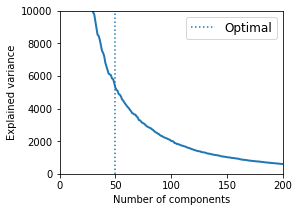

The most optimal estimator value is  50 dimensions.


Components: 	 10 
Accuracy =  0.564327485380117 

Components: 	 20 
Accuracy =  0.6900584795321637 

Components: 	 30 
Accuracy =  0.8187134502923976 

Components: 	 40 
Accuracy =  0.8362573099415205 

Components: 	 50 
Accuracy =  0.8304093567251462 

Components: 	 60 
Accuracy =  0.8450292397660819 

Components: 	 70 
Accuracy =  0.8304093567251462 

Components: 	 80 
Accuracy =  0.8216374269005848 

Components: 	 90 
Accuracy =  0.8245614035087719 

Components: 	 100 
Accuracy =  0.8070175438596491 

Components: 	 110 
Accuracy =  0.7748538011695907 

Components: 	 120 
Accuracy =  0.8216374269005848 

Components: 	 130 
Accuracy =  0.8187134502923976 

Components: 	 140 
Accuracy =  0.8157894736842105 

Components: 	 150 
Accuracy =  0.8011695906432749 



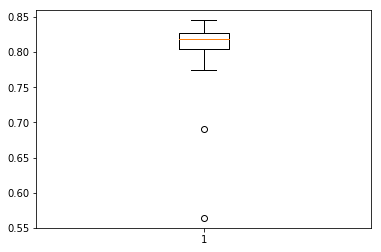

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import Libraries
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
from sklearn.decomposition import PCA

### Create pipeline
pca = decomposition.PCA()
pipe_face_recognition = Pipeline(steps=[('pca', pca)])

logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

pipe_face_recognition.steps.append(('logistic', logistic))


## Code below reworked to use the "best_estimator" from --> http://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import GridSearchCV

# Using the faces dataset variable
pca.fit(X)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

# Prediction
n_components = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

# Using the pipeline from 2.1a and the designated components set from above
estimator = GridSearchCV(pipe_face_recognition,
                         dict(pca__n_components=n_components))
estimator.fit(X, y)

# Using the best_estimator, 
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='Optimal')
plt.legend(prop=dict(size=12))

plt.ylim([0,10000])
plt.xlim([0,200])
plt.show()

print("The most optimal estimator value is ", estimator.best_estimator_.named_steps['pca'].n_components, "dimensions.\n\n")


from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from statistics import stdev

# split into a training and testing set
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

box_plot_accuracy = []

# Print results of each dimension
for i in range(len(n_components)):
    
    ### Setting the pipeline
    pipe_face_recognition.set_params(pca__n_components=n_components[i])
    
    ### Fit the training data
    pipe_face_recognition.fit(X_train, y_train)

    ### Prediction
    pred_results = pipe_face_recognition.decision_function(X_test)
    pred_labels = pipe_face_recognition.predict(X_test)

    #print("Mean = ", results.mean(), ", Std dev =", stdev(results))
    
    print("Components: \t", n_components[i], "\nAccuracy = ", accuracy_score(y_test, pred_labels), "\n")
    box_plot_accuracy.append(accuracy_score(y_test, pred_labels))

    
plt.boxplot(box_plot_accuracy)
plt.show()


From the above dimensions, the highest accuracy was 0.8450292397660819 for 60 components. This closely matches GridSearchCV's best estimator at 50 dimensions. Performing several runs of the above code shows regular switching of highest accuracy between 50 and 60 dimensions suggesting the most optimal amount of components is between 50 and 60 components.


In [17]:
#  compare the performance among linear models. 
#     - Logistic Regression
#     - LinearDiscriminantAnalysis (LDA)

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Optimal components
n_components = 60

# Using PCA + LogisticRegression
logistic = LogisticRegression(penalty='l1', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)

# split into a training and testing set
X = faces.data
y = faces.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

### Setting the pipeline
pipe_face_recognition.set_params(pca__n_components=n_components)

### Fit the training data
pipe_face_recognition.fit(X_train, y_train)

### Prediction
pred_results = pipe_face_recognition.decision_function(X_test)
pred_labels = pipe_face_recognition.predict(X_test)

#print("Mean = ", results.mean(), ", Std dev =", stdev(results))

print("\nPCA + Logistic Regression\nAccuracy = \t", accuracy_score(y_test, pred_labels), 
      "\nRecall = \t", recall_score(y_test, pred_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, pred_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, pred_labels, average='macro'))




# Using PCA + LDA
### Build and set the pipeline
pca = decomposition.PCA()
pipe_pca_lda = Pipeline(steps=[('pca', pca)])
pipe_pca_lda.steps.append(('lda', LinearDiscriminantAnalysis()))
pipe_pca_lda.set_params(pca__n_components=n_components)

### Fitting the training data
pipe_pca_lda.fit(X_train, y_train)

### Prediction
lda_results = pipe_pca_lda.decision_function(X_test)
lda_labels = pipe_pca_lda.predict(X_test)

print("\nPCA + Linear Discrimnant Analysis\nAccuracy = \t", accuracy_score(y_test, lda_labels), 
      "\nRecall = \t", recall_score(y_test, lda_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, lda_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, lda_labels, average='macro'))



PCA + Logistic Regression
Accuracy = 	 0.8508771929824561 
Recall = 	 0.7951465039250541 
Precision = 	 0.8199187984333873 
F-score = 	 0.8066850321338691

PCA + Linear Discrimnant Analysis
Accuracy = 	 0.8742690058479532 
Recall = 	 0.8256283355389613 
Precision = 	 0.8602508469475767 
F-score = 	 0.8416274084779103


Observations: PCA+LogisticRegression achieves slightly lower accuracy than PCA+LDA. 

In [18]:
# compare the performance among non-linear models.
#     - Support Vector Machines (SVM)
#     - Neural Networks


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# PCA + SVM
pca = decomposition.PCA()
pipe_pca_svm = Pipeline(steps=[('pca', pca)])
pipe_pca_svm.steps.append(('svm', SVC()))
pipe_pca_svm.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_svm.fit(X_train, y_train)

### Prediction
svm_results = pipe_pca_svm.decision_function(X_test)
svm_labels = pipe_pca_svm.predict(X_test)

print("\nPCA + Support Vector Machine\nAccuracy = \t", accuracy_score(y_test, svm_labels), 
      "\nRecall = \t", recall_score(y_test, svm_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, svm_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, svm_labels, average='macro'))


# PCA + Neural Networks
pca = decomposition.PCA()
pipe_pca_MLP = Pipeline(steps=[('pca', pca)])
pipe_pca_MLP.steps.append(('mlp', MLPClassifier()))
pipe_pca_MLP.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_MLP.fit(X_train, y_train)

### Prediction
mlp_labels = pipe_pca_MLP.predict(X_test)

print("\nPCA + Neural Networks\nAccuracy = \t", accuracy_score(y_test, mlp_labels), 
      "\nRecall = \t", recall_score(y_test, mlp_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, mlp_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, mlp_labels, average='macro'))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



PCA + Support Vector Machine
Accuracy = 	 0.4649122807017544 
Recall = 	 0.2 
Precision = 	 0.09298245614035087 
F-score = 	 0.12694610778443113

PCA + Neural Networks
Accuracy = 	 0.7076023391812866 
Recall = 	 0.642610155797842 
Precision = 	 0.63087487693422 
F-score = 	 0.6295716448006664


In [19]:
# compare the performance among non-parametric and probabilistic models.
#     - Random Forest Classifier
#     - K-NN Classifer
#     - GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# PCA + Random Forest
pca = decomposition.PCA()
pipe_pca_RFC = Pipeline(steps=[('pca', pca)])
pipe_pca_RFC.steps.append(('rfc', RandomForestClassifier()))
pipe_pca_RFC.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_RFC.fit(X_train, y_train)

### Prediction
rfc_labels = pipe_pca_RFC.predict(X_test)

print("\nPCA + Random Forest Classifier\nAccuracy = \t", accuracy_score(y_test, rfc_labels), 
      "\nRecall = \t", recall_score(y_test, rfc_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, rfc_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, rfc_labels, average='macro'))



# PCA + KNN
pca = decomposition.PCA()
pipe_pca_KNN = Pipeline(steps=[('pca', pca)])
pipe_pca_KNN.steps.append(('knn', KNeighborsClassifier()))
pipe_pca_KNN.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_KNN.fit(X_train, y_train)

### Prediction
knn_labels = pipe_pca_KNN.predict(X_test)

print("\nPCA + K-nearest neighbours\nAccuracy = \t", accuracy_score(y_test, knn_labels), 
      "\nRecall = \t", recall_score(y_test, knn_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, knn_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, knn_labels, average='macro'))



# PCA + Naive Bayes
pca = decomposition.PCA()
pipe_pca_GNB = Pipeline(steps=[('pca', pca)])
pipe_pca_GNB.steps.append(('gnb', GaussianNB()))
pipe_pca_GNB.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_GNB.fit(X_train, y_train)

### Prediction
gnb_labels = pipe_pca_GNB.predict(X_test)

print("\nPCA + Naive Bayes\nAccuracy = \t", accuracy_score(y_test, gnb_labels), 
      "\nRecall = \t", recall_score(y_test, gnb_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, gnb_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, gnb_labels, average='macro'))


PCA + Random Forest Classifier
Accuracy = 	 0.6257309941520468 
Recall = 	 0.44940745343923105 
Precision = 	 0.5460273222162048 
F-score = 	 0.47520530964551205

PCA + K-nearest neighbours
Accuracy = 	 0.6461988304093568 
Recall = 	 0.4960341917044996 
Precision = 	 0.5810268749120586 
F-score = 	 0.5079690925541919

PCA + Naive Bayes
Accuracy = 	 0.827485380116959 
Recall = 	 0.7368907047755111 
Precision = 	 0.8395045931160938 
F-score = 	 0.7781656874093847


    
|   |Recall   | Precision  |  Accuracy |F-measure   |
|---|---|---|---|---|
|  Logistic Regression | 0.801 | 0.832 | 0.854 | 0.815 |
|  LDA | <span style="font-weight:bold">0.823</span> | <span style="font-weight:bold">0.865</span>  | <span style="font-weight:bold">0.880</span>  | <span style="font-weight:bold">0.846</span> |
|  SVM | 0.200 | 0.093 | 0.465 | 0.127 |
|  Neural Networks | 0.601 | 0.585 | 0.681 | 0.590 |
|  Random Forest | 0.460 | 0.597 | 0.646 | 0.485 |
|  K-NN | 0.491 | 0.578 | 0.643 | 0.503 |
|  GaussianNB | 0.726 | 0.818 | 0.822 | 0.763 | |


The model with the highest accuracy uses Principal Components Analysis with 60 dimensions which is then used for Linear Discriminant Analysis. The accuracy attained with this method is 88% using the faces dataset.

In conclusion, as none of the methods achieved 100% it is safe to conclude that another method (such as Convolutional Neural Network) might yet yield a higher percentage of accuracy for predicting the faces. Note that each model also has parameters which can be tuned (much like Logistic Regression was) for optimisation. It can also be stated that key facial features of this supervised model may also be difficult to easily distinguish on the low resolution images used.

In [20]:
# Using a simple decision tree
from sklearn import tree

pca = decomposition.PCA()
pipe_pca_tree = Pipeline(steps=[('pca', pca)])
pipe_pca_tree.steps.append(('tree', tree.DecisionTreeClassifier()))
pipe_pca_tree.set_params(pca__n_components=n_components)

# Fit the training data
pipe_pca_tree.fit(X_train, y_train)

### Prediction
tree_labels = pipe_pca_tree.predict(X_test)

print("\nPCA + ID3 Decision tree\nAccuracy = \t", accuracy_score(y_test, tree_labels), 
      "\nRecall = \t", recall_score(y_test, tree_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y_test, tree_labels, average='macro'),
      "\nF-score = \t", f1_score(y_test, tree_labels, average='macro'))



PCA + ID3 Decision tree
Accuracy = 	 0.5701754385964912 
Recall = 	 0.4485049972438254 
Precision = 	 0.4638388264337632 
F-score = 	 0.4524426554887019


Basic decision tree is a poor solution to this problem. Although is better than SVM.

In [22]:
# Using PCA + LDA with the whole dataset

### Build and set the pipeline
pca = decomposition.PCA()
pipe_pca_lda = Pipeline(steps=[('pca', pca)])
pipe_pca_lda.steps.append(('lda', LinearDiscriminantAnalysis()))
pipe_pca_lda.set_params(pca__n_components=n_components)

### Fitting the training data
pipe_pca_lda.fit(X, y)

### Prediction
lda_results = pipe_pca_lda.decision_function(X)
lda_labels = pipe_pca_lda.predict(X)

print("\nPCA + Linear Discrimnant Analysis\nAccuracy = \t", accuracy_score(y, lda_labels), 
      "\nRecall = \t", recall_score(y, lda_labels, average='macro'), # looking for unweighted mean
      "\nPrecision = \t", precision_score(y, lda_labels, average='macro'),
      "\nF-score = \t", f1_score(y, lda_labels, average='macro'))



PCA + Linear Discrimnant Analysis
Accuracy = 	 0.8885964912280702 
Recall = 	 0.8624245938526421 
Precision = 	 0.8750079923813668 
F-score = 	 0.8684952916767653


Conclusion: Using the whole dataset for training LDA resulted in only a marginal improvement (0.8%) in accuracy, a 4% increase in recall, a 1% improvement in precision, and a 2.2% improvement in F-score.